In [6]:
%pip install phiflow
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from phi.flow import *

In [8]:
v = StaggeredGrid(
    values = lambda pos: vec(
        x = math.cos(pos).vector["x"] * math.sin(pos).vector["y"],
        y = -math.sin(pos).vector["x"] * math.cos(pos).vector["y"],
    ),
    extrapolation=extrapolation.PERIODIC,
    x=25,
    y=25,
    bounds=Box(x = 2*PI, y = 2*PI)
)

In [9]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

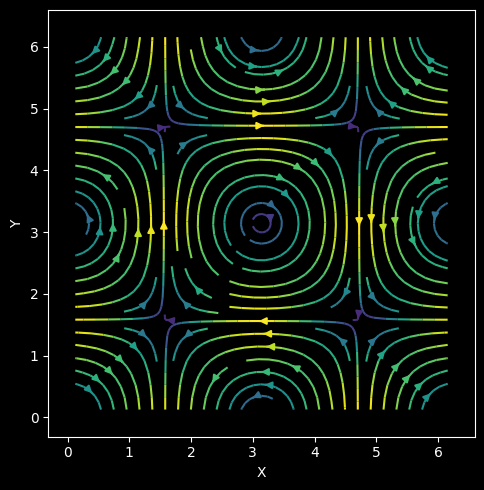

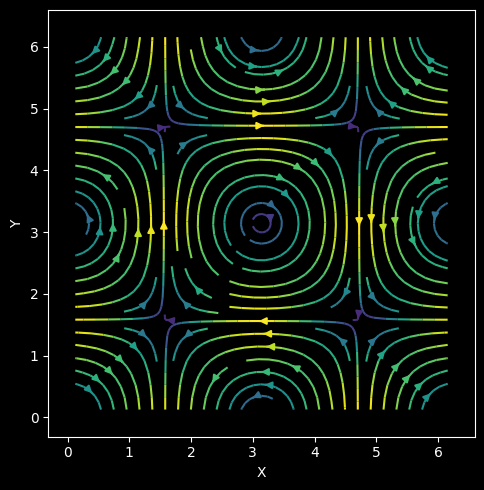

In [10]:
plot(v)